In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("dataset.csv")

In [ ]:
OE_categories = ["Road_traffic_density","Type_of_vehicle"]

ordinal_categories = ["Road_traffic_density","Weatherconditions","Type_of_vehicle","City"]

location_features = ["translogi_latitude","translogi_longitude","Delivery_location_latitude","Delivery_location_longitude"]

standardize_features = ["Temperature","Traffic_Index","Delivery_person_Age","Delivery_person_Ratings"]

In [18]:
df

,ID,Delivery_person_Age,Delivery_person_Ratings,translogi_latitude,translogi_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_vehicle,multiple_deliveries,City,Temperature,Traffic_Index,Time_taken
0,0x4607,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,Sunny,High,2,motorcycle,0.0,Urban,29.0,1.200000,24
1,0xb379,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,Stormy,Jam,2,scooter,1.0,Metropolitian,20.0,2.200000,33
2,0x5d6d,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,Sandstorms,Low,0,motorcycle,1.0,Urban,36.0,0.433333,26
3,0x7a6a,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,Sunny,Medium,0,motorcycle,1.0,Metropolitian,30.0,0.700000,21
4,0x70a2,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,Cloudy,High,1,scooter,1.0,Metropolitian,24.0,3.000000,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,0x7c09,30.0,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,11:35:00,Windy,High,1,motorcycle,0.0,Metropolitian,19.0,3.200000,32
45589,0xd641,21.0,4.6,0.000000,0.000000,0.070000,0.070000,2022-02-16,19:55:00,Windy,Jam,0,motorcycle,1.0,Metropolitian,18.0,2.400000,36
45590,0x4f8d,30.0,4.9,13.022394,80.242439,13.052394,80.272439,2022-03-11,23:50:00,Cloudy,Low,1,scooter,0.0,Metropolitian,26.0,0.533333,16
45591,0x5eee,20.0,4.7,11.001753,76.986241,11.041753,77.026241,2022-03-07,13:35:00,Cloudy,High,0,motorcycle,1.0,Metropolitian,24.0,1.300000,26


In [16]:
data = df["translogi_latitude"].values

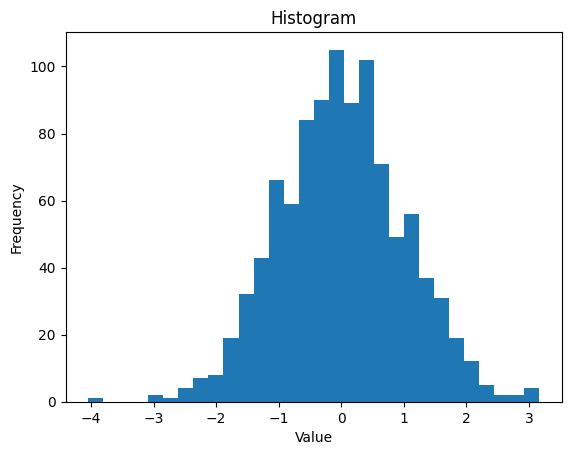

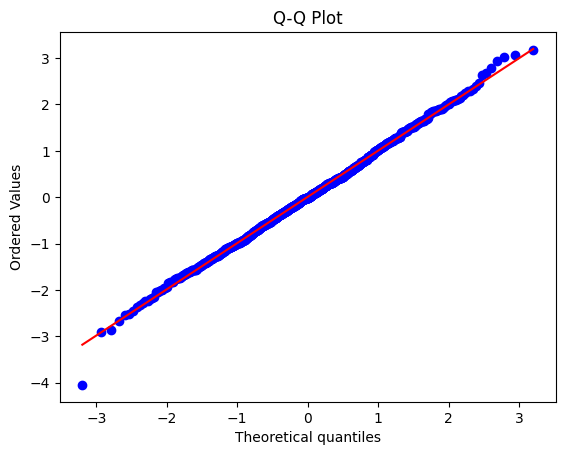

Statistics=0.999, p=0.575
Sample looks Gaussian (fail to reject H0)


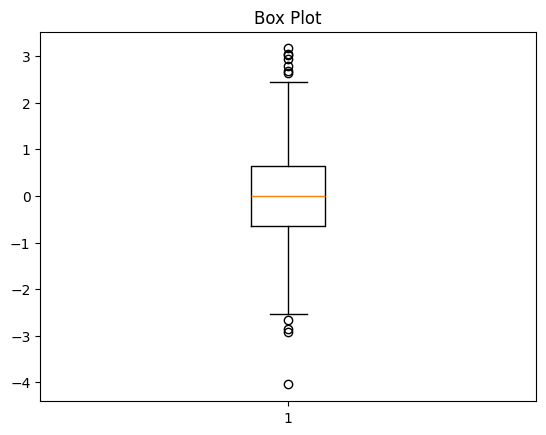

Outliers: [3.020608191153392, 3.055915172934486, 2.6863359493151124, -2.8560725652804555, 3.163999717514394, 2.6315902522315895, 2.7950644366582287, 2.928363427496076, -2.9098484824532536, -2.6676339580267925, -4.046318004736626]


In [17]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import shapiro

# Example data
data = np.random.normal(loc=0, scale=1, size=1000)  # Replace with your data

# Histogram
plt.hist(data, bins=30)
plt.title('Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# Q-Q Plot
stats.probplot(data, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

# Shapiro-Wilk Test
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

# Box Plot
plt.boxplot(data)
plt.title('Box Plot')
plt.show()

# IQR Method
Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = [x for x in data if x < lower_bound or x > upper_bound]
print('Outliers:', outliers)

In [10]:
arr = df["Order_Date"].unique()

In [11]:
df["Road_traffic_density"].unique()

array(['High ', 'Jam ', 'Low ', 'Medium ', nan], dtype=object)

In [12]:
len(arr)

44

In [13]:
arr = df["Time_Orderd"].unique()

In [14]:
len(arr)

177

In [15]:
# Mapping weather conditions to base temperatures
WEATHER_TEMP_MAP = {
    "Sunny": 30.0,
    "Stormy": 22.0,
    "Sandstorms": 35.0,
    "Cloudy": 25.0,
    "Fog": 18.0,
    "Windy": 20.0,
}

# Adjustments for road traffic density
TRAFFIC_TEMP_ADJUSTMENT = {
    "High": -1.0,
    "Medium": 0.0,
    "Low": 1.0,
    "Jam": -2.0,
}

# Function to calculate temperature with robust handling
def calculate_temperature(row):
    # Convert Weatherconditions and Road_traffic_density to strings and strip spaces
    weather = str(row["Weatherconditions"]).strip()
    traffic = str(row["Road_traffic_density"]).strip()
    
    # Get base temperature and traffic adjustment
    base_temp = WEATHER_TEMP_MAP.get(weather, 25.0)  # Default to 25.0 if weather condition is not found
    traffic_adjustment = TRAFFIC_TEMP_ADJUSTMENT.get(traffic, 0.0)  # Default to 0.0 if traffic density is not found
    return base_temp + traffic_adjustment

# Apply the function to the DataFrame
df["Temperature"] = df.apply(calculate_temperature, axis=1)

In [19]:
# Function to calculate traffic index with safe handling of vehicle speed and condition
def calculate_traffic_index(row):
    # Convert Road Traffic Density and Vehicle Condition to string and strip spaces
    traffic_density = str(row["Road_traffic_density"]).strip()
    vehicle_condition = row["Vehicle_condition"]
    
    # Get traffic density weight
    D = TRAFFIC_DENSITY_WEIGHT.get(traffic_density, 2)  # Default to Medium = 2
    
    # Time taken (minutes)
    T = row["Time_taken"]
    
    # Vehicle speed (use default if missing or zero)
    V = row.get("Vehicle_Speed", 30)  # Default speed = 30 km/h if not provided
    if V == 0:
        V = 30  # Default to 30 km/h if speed is zero
    
    # Vehicle condition weight (1=Poor, 2=Fair, 3=Good)
    if vehicle_condition == 0:
        vehicle_condition = 2  # Default to Fair if condition is zero
    
    # Calculate traffic index safely
    TI = (D * T) / (V * vehicle_condition) if V > 0 and vehicle_condition > 0 else None  # Avoid division by zero
    
    return TI

# Apply the function to your DataFrame
df["Traffic_Index"] = df.apply(calculate_traffic_index, axis=1)


In [21]:
df.to_csv("dataset.csv", index=False)

In [24]:
df

,ID,Delivery_person_Age,Delivery_person_Ratings,translogi_latitude,translogi_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_vehicle,multiple_deliveries,City,Time_taken,Temperature,Traffic_Index
0,0x4607,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,Sunny,High,2,motorcycle,0.0,Urban,24,29.0,1.200000
1,0xb379,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,Stormy,Jam,2,scooter,1.0,Metropolitian,33,20.0,2.200000
2,0x5d6d,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,Sandstorms,Low,0,motorcycle,1.0,Urban,26,36.0,0.433333
3,0x7a6a,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,Sunny,Medium,0,motorcycle,1.0,Metropolitian,21,30.0,0.700000
4,0x70a2,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,Cloudy,High,1,scooter,1.0,Metropolitian,30,24.0,3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,0x7c09,30.0,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,11:35:00,Windy,High,1,motorcycle,0.0,Metropolitian,32,19.0,3.200000
45589,0xd641,21.0,4.6,0.000000,0.000000,0.070000,0.070000,2022-02-16,19:55:00,Windy,Jam,0,motorcycle,1.0,Metropolitian,36,18.0,2.400000
45590,0x4f8d,30.0,4.9,13.022394,80.242439,13.052394,80.272439,2022-03-11,23:50:00,Cloudy,Low,1,scooter,0.0,Metropolitian,16,26.0,0.533333
45591,0x5eee,20.0,4.7,11.001753,76.986241,11.041753,77.026241,2022-03-07,13:35:00,Cloudy,High,0,motorcycle,1.0,Metropolitian,26,24.0,1.300000


In [25]:
col = df.pop("Time_taken")
df.insert(17, col.name, col)

In [27]:
df.to_csv("dataset.csv", index=False)

In [5]:
import requests
import pandas as pd

def get_traffic_index(api_key, location):
    url = "https://api.tomtom.com/traffic/services/4/flowSegmentData/absolute/10/json"
    params = {
        'key': api_key,
        'point': location
    }
    
    response = requests.get(url, params=params)
    
    if response.status_code == 200:
        data = response.json()
        return data
    else:
        print(f"Error: {response.status_code}, {response.text}")
        return None

api_key = 'your_api_key_here'
location = '12.913041,77.683237'

traffic_data = get_traffic_index(api_key, location)

if traffic_data:
    flow_data = traffic_data['flowSegmentData']
    current_travel_time = flow_data['currentTravelTime']
    free_flow_travel_time = flow_data['freeFlowTravelTime']
    
    # Calculate traffic index
    traffic_index = current_travel_time / free_flow_travel_time

Traffic Index: 1.275826972010178
    frc  currentSpeed  freeFlowSpeed  currentTravelTime  freeFlowTravelTime  \
0  FRC3            29             37               2507                1965   

   confidence  roadClosure                                        coordinates  \
0           1        False  {'coordinate': [{'latitude': 12.92045698397870...   

                       @version  
0  traffic-service-flow 1.0.125  
      latitude  longitude
0    12.920457  77.665612
1    12.920397  77.665763
2    12.920327  77.665946
3    12.920268  77.666082
4    12.920224  77.666197
..         ...        ...
773  12.961184  77.747610
774  12.961202  77.747617
775  12.961216  77.747618
776  12.961282  77.747630
777  12.961337  77.747630

[778 rows x 2 columns]


In [7]:
traffic_index

1.275826972010178